In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import keras
from sklearn.utils import resample
from keras.optimizers import SGD
from keras.models import model_from_json
from IPython.display import clear_output
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [72]:
def evaluate_case(data, eva_model):
    evaluate_cases = {}
    for i in range(eva_model):
        dataY = [data[ii][-eva_model+i] for ii in range(len(data))]
        evaluate_cases[i] = dataY
        
    return evaluate_cases

# Mean Absolute Percentage Error
def mean_absolute_percentage_error(data_true, data_predict):
    error = 0
    count = 0
    for i in range(len(data_true)):
        if data_true[i] == 0:
            continue
        error += np.abs((data_true[i]-data_predict[i])/(data_true[i]))
        count += 1
        
    return((error/count)*100)

# bootstrapping 
def bootstrap(dataset, sample_size):
    
    sample_size = int(len(train)*0.8)
    boot = resample(train, replace=True, n_samples=sample_size, random_state=2)
    
    return boot

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    dataX, dataY = [],[]
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        dataX.append(seq_x)
        dataY.append(seq_y)
        
    return np.array(dataX), np.array(dataY)

In [85]:
# using only one panel for training the model
filename = "one_week.csv"
dataset = pd.read_csv(filename)
dataset = dataset.dropna()
dataset = dataset['28563601'].values

# # normalize the data
# scaler = MinMaxScaler(feature_range=(0,1))
# dataset = scaler.fit_transform([dataset])

# the number of time steps
n_steps = 3

# split into samples
X, y = split_sequence(dataset, n_steps)

# split train and test data
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.4, random_state=42)

In [86]:
model = Sequential()
model.add(Dense(32, input_dim=n_steps, kernel_initializer='he_uniform'))
model.add(Activation('relu'))
# model.add(Dense(32))
# model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('linear'))
opt = SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss = 'mean_absolute_error', optimizer=opt)
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 32)                128       
_________________________________________________________________
activation_37 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 32)                1056      
_________________________________________________________________
activation_38 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 33        
_________________________________________________________________
activation_39 (Activation)   (None, 1)                 0         
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
___________________________________________________

In [87]:
history = model.fit(trainX, trainY, validation_data=(testX, testY),epochs=1000, 
                    batch_size=32, verbose=1)

Train on 450 samples, validate on 300 samples
Epoch 1/1000
450/450 [==============================] - 0s 393us/step - loss: 101.9458 - val_loss: 48.7516
Epoch 2/1000
450/450 [==============================] - 0s 46us/step - loss: 47.3124 - val_loss: 132.6875
Epoch 3/1000
450/450 [==============================] - 0s 41us/step - loss: 93.0195 - val_loss: 47.6101
Epoch 4/1000
450/450 [==============================] - 0s 43us/step - loss: 44.9013 - val_loss: 47.8862
Epoch 5/1000
450/450 [==============================] - 0s 41us/step - loss: 44.6085 - val_loss: 47.4763
Epoch 6/1000
450/450 [==============================] - 0s 37us/step - loss: 44.5661 - val_loss: 47.5555
Epoch 7/1000
450/450 [==============================] - 0s 40us/step - loss: 44.7472 - val_loss: 47.4555
Epoch 8/1000
450/450 [==============================] - 0s 38us/step - loss: 44.5845 - val_loss: 47.5765
Epoch 9/1000
450/450 [==============================] - 0s 35us/step - loss: 44.6001 - val_loss: 47.5334
Epoch 

Epoch 78/1000
450/450 [==============================] - 0s 38us/step - loss: 44.6364 - val_loss: 47.4748
Epoch 79/1000
450/450 [==============================] - 0s 32us/step - loss: 44.6026 - val_loss: 47.4910
Epoch 80/1000
450/450 [==============================] - 0s 35us/step - loss: 44.3768 - val_loss: 47.4353
Epoch 81/1000
450/450 [==============================] - 0s 35us/step - loss: 44.3501 - val_loss: 47.4849
Epoch 82/1000
450/450 [==============================] - 0s 36us/step - loss: 44.3781 - val_loss: 47.4447
Epoch 83/1000
450/450 [==============================] - 0s 34us/step - loss: 44.3594 - val_loss: 47.4341
Epoch 84/1000
450/450 [==============================] - 0s 37us/step - loss: 44.3482 - val_loss: 47.4758
Epoch 85/1000
450/450 [==============================] - 0s 35us/step - loss: 44.3550 - val_loss: 47.5186
Epoch 86/1000
450/450 [==============================] - 0s 32us/step - loss: 44.3756 - val_loss: 47.5333
Epoch 87/1000
450/450 [=======================

Epoch 155/1000
450/450 [==============================] - 0s 36us/step - loss: 44.3359 - val_loss: 47.4460
Epoch 156/1000
450/450 [==============================] - 0s 34us/step - loss: 44.3493 - val_loss: 47.4657
Epoch 157/1000
450/450 [==============================] - 0s 33us/step - loss: 44.4164 - val_loss: 47.4651
Epoch 158/1000
450/450 [==============================] - 0s 35us/step - loss: 44.3577 - val_loss: 47.4291
Epoch 159/1000
450/450 [==============================] - 0s 34us/step - loss: 44.3406 - val_loss: 47.4254
Epoch 160/1000
450/450 [==============================] - 0s 36us/step - loss: 44.3617 - val_loss: 47.4580
Epoch 161/1000
450/450 [==============================] - 0s 36us/step - loss: 44.3856 - val_loss: 47.4330
Epoch 162/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4862 - val_loss: 47.4690
Epoch 163/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4151 - val_loss: 47.4234
Epoch 164/1000
450/450 [=============

450/450 [==============================] - 0s 37us/step - loss: 44.4419 - val_loss: 47.5227
Epoch 232/1000
450/450 [==============================] - 0s 36us/step - loss: 44.6035 - val_loss: 47.5149
Epoch 233/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4235 - val_loss: 47.6403
Epoch 234/1000
450/450 [==============================] - 0s 36us/step - loss: 44.6166 - val_loss: 47.5902
Epoch 235/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4669 - val_loss: 47.5517
Epoch 236/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4828 - val_loss: 47.7073
Epoch 237/1000
450/450 [==============================] - 0s 37us/step - loss: 44.5311 - val_loss: 47.5571
Epoch 238/1000
450/450 [==============================] - 0s 37us/step - loss: 44.4499 - val_loss: 47.5171
Epoch 239/1000
450/450 [==============================] - 0s 38us/step - loss: 44.4669 - val_loss: 47.5529
Epoch 240/1000
450/450 [============================

450/450 [==============================] - 0s 35us/step - loss: 44.5240 - val_loss: 47.5219
Epoch 308/1000
450/450 [==============================] - 0s 36us/step - loss: 44.5448 - val_loss: 47.6785
Epoch 309/1000
450/450 [==============================] - 0s 35us/step - loss: 44.4848 - val_loss: 47.5490
Epoch 310/1000
450/450 [==============================] - 0s 34us/step - loss: 44.5084 - val_loss: 47.5189
Epoch 311/1000
450/450 [==============================] - 0s 35us/step - loss: 44.4583 - val_loss: 47.7864
Epoch 312/1000
450/450 [==============================] - 0s 38us/step - loss: 44.6620 - val_loss: 47.6892
Epoch 313/1000
450/450 [==============================] - 0s 35us/step - loss: 44.5118 - val_loss: 47.5188
Epoch 314/1000
450/450 [==============================] - 0s 36us/step - loss: 44.5593 - val_loss: 47.5997
Epoch 315/1000
450/450 [==============================] - 0s 37us/step - loss: 44.5725 - val_loss: 47.5117
Epoch 316/1000
450/450 [============================

450/450 [==============================] - 0s 35us/step - loss: 44.5307 - val_loss: 47.5134
Epoch 384/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4245 - val_loss: 47.7539
Epoch 385/1000
450/450 [==============================] - 0s 35us/step - loss: 44.7062 - val_loss: 47.5731
Epoch 386/1000
450/450 [==============================] - 0s 35us/step - loss: 44.6251 - val_loss: 47.5308
Epoch 387/1000
450/450 [==============================] - 0s 37us/step - loss: 44.5917 - val_loss: 47.5490
Epoch 388/1000
450/450 [==============================] - 0s 38us/step - loss: 44.4379 - val_loss: 47.5132
Epoch 389/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4901 - val_loss: 47.6012
Epoch 390/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4431 - val_loss: 47.5375
Epoch 391/1000
450/450 [==============================] - 0s 37us/step - loss: 44.4793 - val_loss: 47.5157
Epoch 392/1000
450/450 [============================

450/450 [==============================] - 0s 38us/step - loss: 44.4631 - val_loss: 47.5133
Epoch 460/1000
450/450 [==============================] - 0s 40us/step - loss: 44.4611 - val_loss: 47.5197
Epoch 461/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4290 - val_loss: 47.5396
Epoch 462/1000
450/450 [==============================] - 0s 35us/step - loss: 44.4471 - val_loss: 47.5150
Epoch 463/1000
450/450 [==============================] - 0s 34us/step - loss: 44.5340 - val_loss: 47.5477
Epoch 464/1000
450/450 [==============================] - 0s 35us/step - loss: 44.5375 - val_loss: 47.8214
Epoch 465/1000
450/450 [==============================] - 0s 35us/step - loss: 44.5809 - val_loss: 47.5760
Epoch 466/1000
450/450 [==============================] - 0s 34us/step - loss: 44.4421 - val_loss: 47.5506
Epoch 467/1000
450/450 [==============================] - 0s 34us/step - loss: 44.4361 - val_loss: 47.6897
Epoch 468/1000
450/450 [============================

450/450 [==============================] - 0s 37us/step - loss: 44.4344 - val_loss: 47.6962
Epoch 536/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4729 - val_loss: 47.5553
Epoch 537/1000
450/450 [==============================] - 0s 37us/step - loss: 44.5144 - val_loss: 47.5143
Epoch 538/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4742 - val_loss: 47.5758
Epoch 539/1000
450/450 [==============================] - 0s 39us/step - loss: 44.4444 - val_loss: 47.5528
Epoch 540/1000
450/450 [==============================] - 0s 42us/step - loss: 44.4602 - val_loss: 47.5204
Epoch 541/1000
450/450 [==============================] - 0s 35us/step - loss: 44.4179 - val_loss: 47.5918
Epoch 542/1000
450/450 [==============================] - 0s 35us/step - loss: 44.5785 - val_loss: 47.6836
Epoch 543/1000
450/450 [==============================] - 0s 34us/step - loss: 44.4671 - val_loss: 47.5715
Epoch 544/1000
450/450 [============================

450/450 [==============================] - 0s 35us/step - loss: 44.5051 - val_loss: 47.5191
Epoch 612/1000
450/450 [==============================] - 0s 35us/step - loss: 44.4870 - val_loss: 47.5253
Epoch 613/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4644 - val_loss: 47.5203
Epoch 614/1000
450/450 [==============================] - 0s 35us/step - loss: 44.4298 - val_loss: 47.5140
Epoch 615/1000
450/450 [==============================] - 0s 35us/step - loss: 44.5194 - val_loss: 47.5317
Epoch 616/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4947 - val_loss: 47.5199
Epoch 617/1000
450/450 [==============================] - 0s 37us/step - loss: 44.4585 - val_loss: 47.5177
Epoch 618/1000
450/450 [==============================] - 0s 35us/step - loss: 44.4643 - val_loss: 47.5257
Epoch 619/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4509 - val_loss: 47.5477
Epoch 620/1000
450/450 [============================

450/450 [==============================] - 0s 38us/step - loss: 44.5825 - val_loss: 47.5184
Epoch 688/1000
450/450 [==============================] - 0s 33us/step - loss: 44.4942 - val_loss: 47.6649
Epoch 689/1000
450/450 [==============================] - 0s 37us/step - loss: 44.4572 - val_loss: 47.5392
Epoch 690/1000
450/450 [==============================] - 0s 40us/step - loss: 44.4884 - val_loss: 47.5188
Epoch 691/1000
450/450 [==============================] - 0s 37us/step - loss: 44.4092 - val_loss: 47.5902
Epoch 692/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4528 - val_loss: 47.5599
Epoch 693/1000
450/450 [==============================] - 0s 37us/step - loss: 44.4448 - val_loss: 47.5176
Epoch 694/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4399 - val_loss: 47.5590
Epoch 695/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4291 - val_loss: 47.6043
Epoch 696/1000
450/450 [============================

450/450 [==============================] - 0s 36us/step - loss: 44.4412 - val_loss: 47.6106
Epoch 764/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4766 - val_loss: 47.6105
Epoch 765/1000
450/450 [==============================] - 0s 34us/step - loss: 44.4570 - val_loss: 47.5467
Epoch 766/1000
450/450 [==============================] - 0s 35us/step - loss: 44.4716 - val_loss: 47.5179
Epoch 767/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4878 - val_loss: 47.5151
Epoch 768/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4659 - val_loss: 47.5109
Epoch 769/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4514 - val_loss: 47.5119
Epoch 770/1000
450/450 [==============================] - 0s 36us/step - loss: 44.5719 - val_loss: 47.5164
Epoch 771/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4705 - val_loss: 47.5916
Epoch 772/1000
450/450 [============================

450/450 [==============================] - 0s 35us/step - loss: 44.4377 - val_loss: 47.5304
Epoch 840/1000
450/450 [==============================] - 0s 38us/step - loss: 44.4327 - val_loss: 47.5168
Epoch 841/1000
450/450 [==============================] - 0s 39us/step - loss: 44.4235 - val_loss: 47.5236
Epoch 842/1000
450/450 [==============================] - 0s 36us/step - loss: 44.5928 - val_loss: 47.5286
Epoch 843/1000
450/450 [==============================] - 0s 37us/step - loss: 44.4339 - val_loss: 47.6341
Epoch 844/1000
450/450 [==============================] - 0s 38us/step - loss: 44.4917 - val_loss: 47.6756
Epoch 845/1000
450/450 [==============================] - 0s 37us/step - loss: 44.4501 - val_loss: 47.5479
Epoch 846/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4889 - val_loss: 47.5293
Epoch 847/1000
450/450 [==============================] - 0s 35us/step - loss: 44.4649 - val_loss: 47.5163
Epoch 848/1000
450/450 [============================

450/450 [==============================] - 0s 35us/step - loss: 44.4461 - val_loss: 47.5179
Epoch 916/1000
450/450 [==============================] - 0s 34us/step - loss: 44.4328 - val_loss: 47.5411
Epoch 917/1000
450/450 [==============================] - 0s 34us/step - loss: 44.4308 - val_loss: 47.5477
Epoch 918/1000
450/450 [==============================] - 0s 32us/step - loss: 44.5157 - val_loss: 47.5141
Epoch 919/1000
450/450 [==============================] - 0s 34us/step - loss: 44.4224 - val_loss: 47.5652
Epoch 920/1000
450/450 [==============================] - 0s 34us/step - loss: 44.4199 - val_loss: 47.5147
Epoch 921/1000
450/450 [==============================] - 0s 32us/step - loss: 44.4760 - val_loss: 47.5251
Epoch 922/1000
450/450 [==============================] - 0s 33us/step - loss: 44.4784 - val_loss: 47.5164
Epoch 923/1000
450/450 [==============================] - 0s 33us/step - loss: 44.4270 - val_loss: 47.6066
Epoch 924/1000
450/450 [============================

450/450 [==============================] - 0s 36us/step - loss: 44.4521 - val_loss: 47.5199
Epoch 992/1000
450/450 [==============================] - 0s 34us/step - loss: 44.4253 - val_loss: 47.5349
Epoch 993/1000
450/450 [==============================] - 0s 34us/step - loss: 44.4250 - val_loss: 47.5200
Epoch 994/1000
450/450 [==============================] - 0s 34us/step - loss: 44.4270 - val_loss: 47.5354
Epoch 995/1000
450/450 [==============================] - 0s 35us/step - loss: 44.4436 - val_loss: 47.5353
Epoch 996/1000
450/450 [==============================] - 0s 35us/step - loss: 44.5246 - val_loss: 47.5359
Epoch 997/1000
450/450 [==============================] - 0s 33us/step - loss: 44.4947 - val_loss: 47.5136
Epoch 998/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4758 - val_loss: 47.5557
Epoch 999/1000
450/450 [==============================] - 0s 36us/step - loss: 44.4221 - val_loss: 47.5205
Epoch 1000/1000
450/450 [===========================

In [88]:
# evaluate the model
train_mse = model.evaluate(trainX, trainY, verbose=0)
test_mse = model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 44.419, Test: 47.522


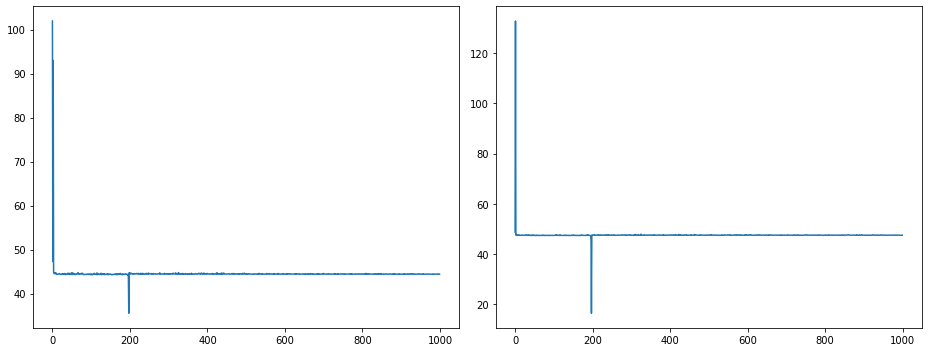

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
axes[0].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
fig.tight_layout()

In [90]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

train_predict = [i for i in trainPredict]
test_predict = [i for i in testPredict]
prediction = train_predict + test_predict

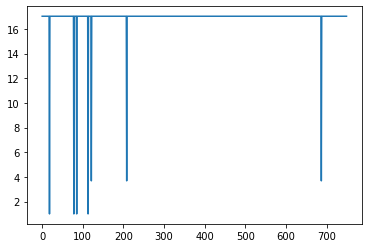

In [91]:
plt.plot(prediction)